In [130]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

from datetime import datetime
import time
import xgboost as xgb

from sklearn.model_selection import train_test_split


In [131]:
raw_df = pd.read_csv('list_gz.csv', low_memory = False)
print(f"Contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns))

raw_df.head()

Contains 8852 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20190922191701,2019-09-22,Hyde Park Private Room - Pleasant Walk to UChi...,You are invited to be the sole Airbnb guest in...,"The private bedroom has a queen size bed, beds...",You are invited to be the sole Airbnb guest in...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) guest only - th...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,NaN,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78886,-87.58671,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",NaN,$50.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,91,2,2,91,91,2.0,91.0,3 weeks ago,t,2,28,55,330,2019-09-22,170,38,2015-01-09,2019-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,https://www.airbnb.com/rooms/4505,20190922191701,2019-09-22,One Great Apartment. 377 Great Reviews. 1 Bad ...,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,NaN,The CTA train station is 30 yards (27 meters) ...,We also have a huge yard. Use it (weather perm...,NaN,Don't sit around all day watching T.V. Don't h...,NaN,NaN,https://a0.muscache.com/im/pictures/15019798/7...,NaN,5775,https://www.airbnb.com/users/show/5775,Craig & Kathleen,2008-12-29,"Chicago, Illinois, United States",Incredibly creative(Kathleen) and stunningly a...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/5775/profile_...,https://a0.muscache.com/im/use

# Testing KNN without cleaning and univariate

In [138]:
temp = raw_df.copy()
temp = raw_df[['price', 'accommodates']].copy()

temp['price'] = temp['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

temp.head()

,price,accommodates
0,50.0,1
1,117.0,7
2,80.0,2
3,150.0,4
4,215.0,4


### KNN Method # 1

In [139]:
from sklearn.model_selection import train_test_split

y = temp['price']
X = temp.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) 

k: 1, Train/Test Score: 0.026/0.020
k: 3, Train/Test Score: 0.025/0.018
k: 5, Train/Test Score: 0.023/0.016
k: 7, Train/Test Score: 0.023/0.016
k: 9, Train/Test Score: 0.033/0.028
k: 11, Train/Test Score: 0.040/0.032
k: 13, Train/Test Score: 0.038/0.032
k: 15, Train/Test Score: 0.038/0.033
k: 17, Train/Test Score: 0.041/0.033
k: 19, Train/Test Score: 0.041/0.033
k: 21, Train/Test Score: 0.044/0.036
k: 23, Train/Test Score: 0.043/0.033
k: 25, Train/Test Score: 0.042/0.033
k: 27, Train/Test Score: 0.042/0.033
k: 29, Train/Test Score: 0.041/0.032
k: 31, Train/Test Score: 0.044/0.036
k: 33, Train/Test Score: 0.044/0.035
k: 35, Train/Test Score: 0.044/0.034
k: 37, Train/Test Score: 0.044/0.034
k: 39, Train/Test Score: 0.044/0.034
k: 41, Train/Test Score: 0.045/0.036
k: 43, Train/Test Score: 0.046/0.039
k: 45, Train/Test Score: 0.046/0.039
k: 47, Train/Test Score: 0.046/0.039
k: 49, Train/Test Score: 0.046/0.039
k: 51, Train/Test Score: 0.046/0.039
k: 53, Train/Test Score: 0.041/0.033
k: 55,

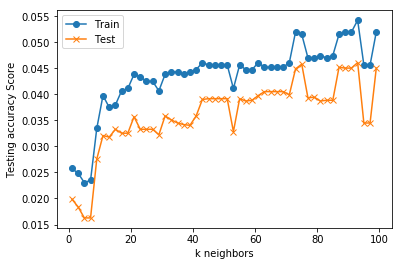

In [141]:
train_scores = []
test_scores = []

for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 2), train_scores, marker='o', label='Train')
plt.plot(range(1, 100, 2), test_scores, marker="x", label='Test')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

In [107]:
knn = KNeighborsClassifier(n_neighbors=93)
knn.fit(X_train, y_train)
print('k=93 Test Acc: %.3f' % knn.score(X_test, y_test))

k=93 Test Acc: 0.046


### KNN Method # 2, with RMSE

In [31]:
len(y_train)

2213

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

train_df = temp.iloc[0:2213]
test_df = temp.iloc[2213:]

train_columns = ['accommodates']

knn = KNeighborsRegressor(n_neighbors=93, algorithm='auto')
# knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

features = train_df.columns.tolist()
features.remove('price')
knn.fit(train_df[features], train_df['price'])

all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)
all_features_rmse = all_features_mse ** (1/2)

print(f'MSE: ${all_features_mse:,.2f}')
print(f'RMSE: ${all_features_rmse:,.2f}')

MSE: $172,616.57
RMSE: $415.47


In [137]:
all_features_predictions

array([135.75268817, 135.75268817, 135.75268817, ..., 294.24731183,
       294.24731183, 104.7311828 ])

# Cleaning Data

In [94]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
air_df = raw_df.drop(cols_to_drop, axis=1).copy()

air_df.head()

,id,experiences_offered,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,none,2008-08-29,within an hour,100%,NaN,t,1,1,t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,NaN,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78886,-87.58671,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",NaN,$50.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,91,2,2,91,91,2.0,91.0,3 weeks ago,t,2,28,55,330,170,38,2015-01-09,2019-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,none,2008-12-29,within a few hours,100%,NaN,t,1,1,t,t,"Chicago, IL, United States",Little Village,South Lawndale,NaN,Chicago,IL,60608,Chicago,"Chicago, IL",US,United States,41.85495,-87.69696,t,Apartment,Entire home/apt,7,1.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$117.00,$925.00,NaN,$0.00,$35.00,2,$25.00,2,60,2,2,60,60,2.0,60.0,4 weeks ago,t,19,43,73,348,383,22,2009-03-06,2019-09-08,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,R19000037538,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,1,0,0,2.98
2,7126,none,2009-05-19,within an hour,100%,NaN,t,2,2,t,f,"Chicago, IL, United States",Ukrainian Village,West Town,NaN,Chicago,IL,60622,Chicago,"Chicago, IL",US,United States,41.90289,-87.68182,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$80.00,$600.00,NaN,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,2 days ago,t,11,28,58,329,360,45,2009-07-03,2019-09-16,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,R18000034991,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,1,1,0,0,2.89
3,9811,none,2009-08-21,within an hour,100%,NaN,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,NaN,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91769,-87.63788,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$150.00,"$1,050.00","$3,400.00",NaN,$95.00,2,$25.00,4,180,4,4,180,180,4.0,180.0,3 days ago,t,16,45,75,350,43,13,2014-04-15,2019-09-15,91.0,9.0,9.0,10.0,9.0,10.0,9.0,t,2079260,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,10,10,0,0,0.65
4,10945,none,2009-08-21,within an hour,100%,NaN,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,NaN,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91183,-87.64000,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$215.00,NaN,NaN,$0.00,$10

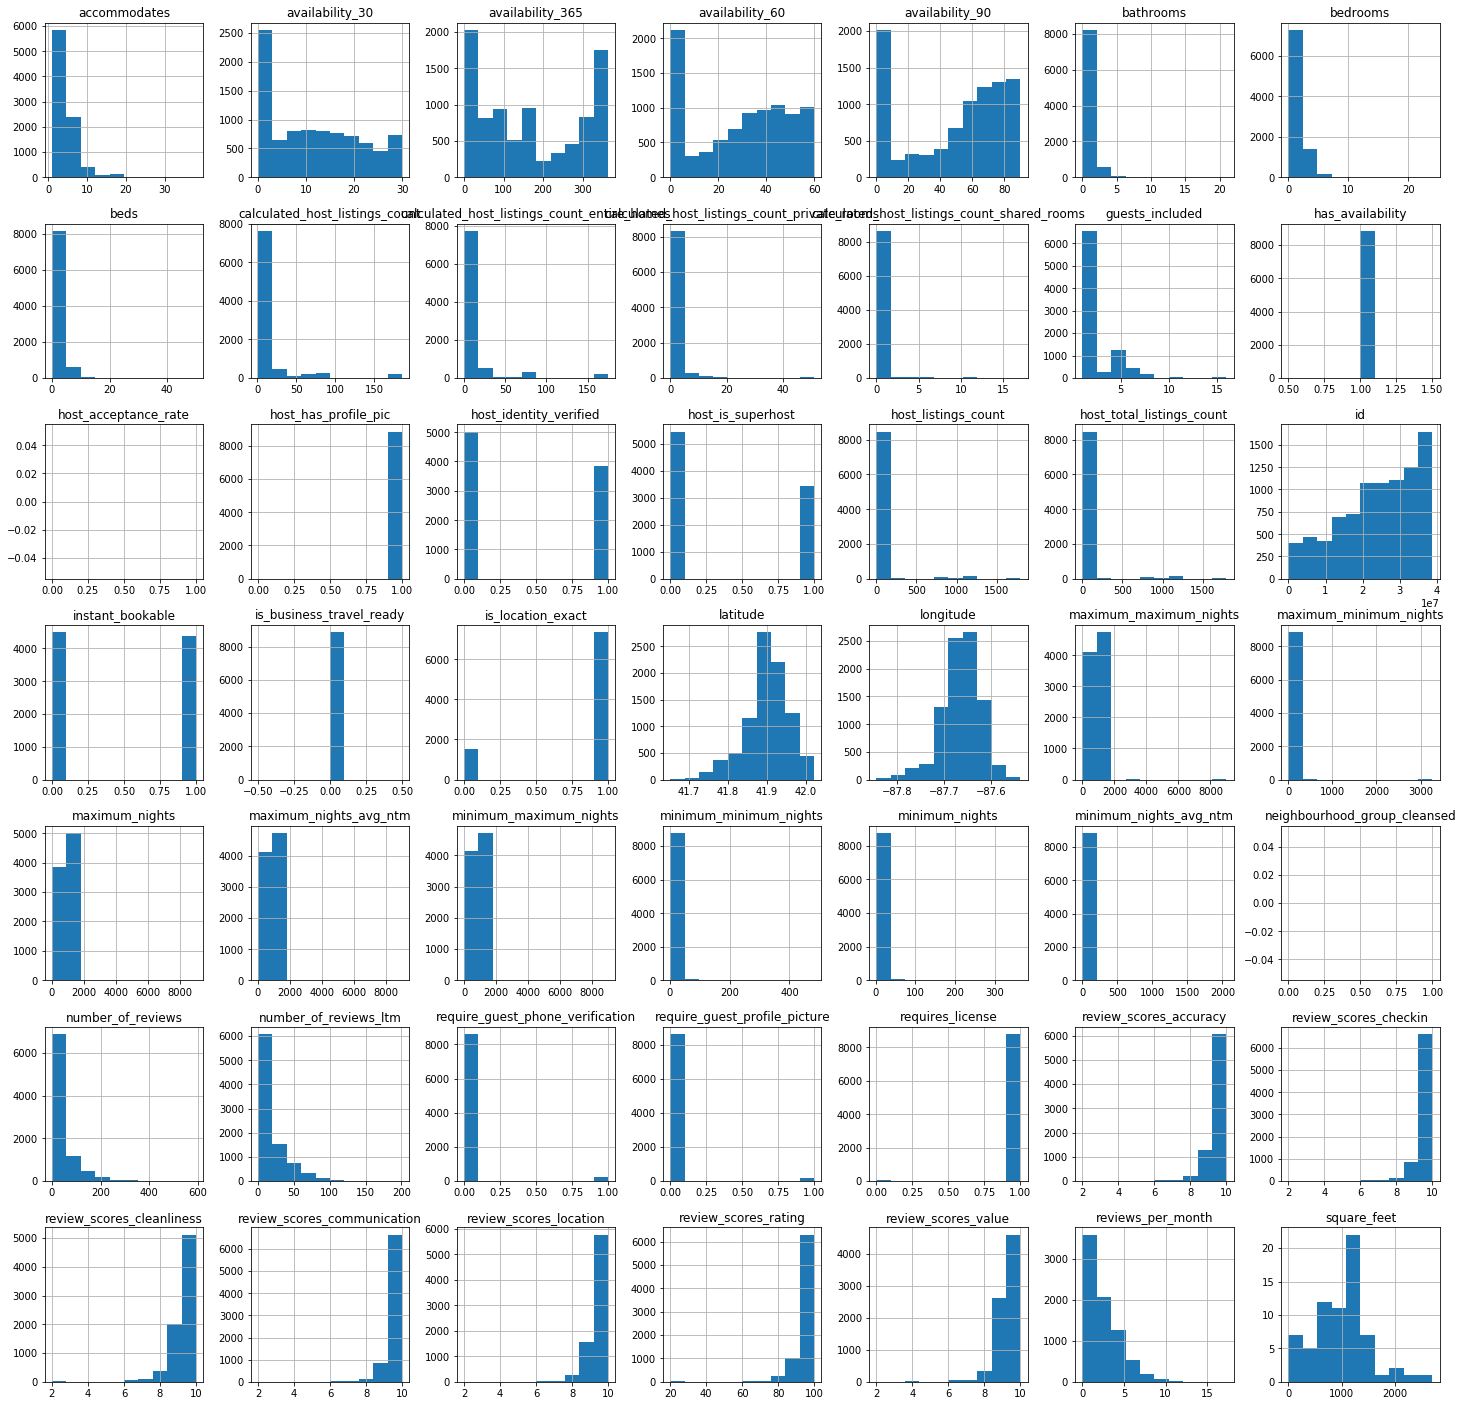

In [95]:
# Replacing columns with f/t with 0/1
air_df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
air_df.hist(figsize=(25,25));

In [64]:
print(air_df['experiences_offered'].value_counts())
air_df.isna().sum().sort_values(ascending = False)

none    8852
Name: experiences_offered, dtype: int64


host_acceptance_rate                            8852
neighbourhood_group_cleansed                    8852
square_feet                                     8783
monthly_price                                   8284
weekly_price                                    8256
security_deposit                                2163
review_scores_communication                     1189
review_scores_checkin                           1188
review_scores_value                             1188
review_scores_location                          1188
review_scores_rating                            1187
review_scores_accuracy                          1187
review_scores_cleanliness                       1187
reviews_per_month                               1111
last_review                                     1111
first_review                                    1111
host_response_rate                              1033
host_response_time                              1033
cleaning_fee                                  

In [56]:
# https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago
# neighbourhood_cleaned might be community

raw_df[['neighbourhood', 'neighbourhood_cleansed']].head(10)

,neighbourhood,neighbourhood_cleansed
0,Hyde Park,Hyde Park
1,Little Village,South Lawndale
2,Ukrainian Village,West Town
3,Old Town,Lincoln Park
4,Old Town,Lincoln Park
5,Lincoln Park,Lincoln Park
6,West Town/Noble Square,West Town
7,Old Town,Lincoln Park
8,Bucktown,Logan Square
9,Uptown,Uptown


In [65]:
cols_to_drop = ['experiences_offered', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'monthly_price', 'weekly_price', 'jurisdiction_names']
air_df = air_df.drop(cols_to_drop, axis=1)

air_df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,2008-08-29,within an hour,100%,t,1,1,t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78886,-87.58671,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",$50.00,$0.00,$20.00,1,$0.00,2,91,2,2,91,91,2.0,91.0,3 weeks ago,t,2,28,55,330,170,38,2015-01-09,2019-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,2008-12-29,within a few hours,100%,t,1,1,t,t,"Chicago, IL, United States",Little Village,South Lawndale,Chicago,IL,60608,Chicago,"Chicago, IL",US,United States,41.85495,-87.69696,t,Apartment,Entire home/apt,7,1.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$117.00,$0.00,$35.00,2,$25.00,2,60,2,2,60,60,2.0,60.0,4 weeks ago,t,19,43,73,348,383,22,2009-03-06,2019-09-08,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,R19000037538,t,f,moderate,f,f,1,1,0,0,2.98
2,7126,2009-05-19,within an hour,100%,t,2,2,t,f,"Chicago, IL, United States",Ukrainian Village,West Town,Chicago,IL,60622,Chicago,"Chicago, IL",US,United States,41.90289,-87.68182,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$80.00,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,2 days ago,t,11,28,58,329,360,45,2009-07-03,2019-09-16,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,R18000034991,f,f,moderate,f,f,1,1,0,0,2.89
3,9811,2009-08-21,within an hour,100%,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91769,-87.63788,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$150.00,NaN,$95.00,2,$25.00,4,180,4,4,180,180,4.0,180.0,3 days ago,t,16,45,75,350,43,13,2014-04-15,2019-09-15,91.0,9.0,9.0,10.0,9.0,10.0,9.0,t,2079260,t,f,strict_14_with_grace_period,f,f,10,10,0,0,0.65
4,10945,2009-08-21,within an hour,100%,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91183,-87.64000,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$215.00,$0.00,$100.00,2,$25.00,4,180,4,4,180,180,4.0,180.0,4 weeks ago,t,12,23,27,302,14,6,2014-04-28,2019-08-27,90.0,9.0,10.0,9.0,9.0,10.0,9.0,t,2120297,t,f,strict_14_with_grace_period,f,f,10,10,0,0,0.21


In [61]:
# is there a difference between these 2 columns? 

air_df.loc[((air_df.host_listings_count == air_df.host_total_listings_count) == False)][:5]

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Both the `host_listings_count` and `host_total_listings_count` have the same values. One will be dropped

In [ ]:
temp = ['street', 
        'city', 
        'state', 
        'market',
        'smart_location',
        'country_code',
        'country',
        'requires_license'
       ]

for col in temp:
    print(f'{col}:\n{air_df[col].value_counts()}\n')

In [62]:
cols_to_drop = ['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

air_df.drop(cols_to_drop, axis=1)

air_df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,2008-08-29,within an hour,100%,t,1,1,t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78886,-87.58671,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",$50.00,$0.00,$20.00,1,$0.00,2,91,2,2,91,91,2.0,91.0,3 weeks ago,t,2,28,55,330,170,38,2015-01-09,2019-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,2008-12-29,within a few hours,100%,t,1,1,t,t,"Chicago, IL, United States",Little Village,South Lawndale,Chicago,IL,60608,Chicago,"Chicago, IL",US,United States,41.85495,-87.69696,t,Apartment,Entire home/apt,7,1.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$117.00,$0.00,$35.00,2,$25.00,2,60,2,2,60,60,2.0,60.0,4 weeks ago,t,19,43,73,348,383,22,2009-03-06,2019-09-08,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,R19000037538,t,f,moderate,f,f,1,1,0,0,2.98
2,7126,2009-05-19,within an hour,100%,t,2,2,t,f,"Chicago, IL, United States",Ukrainian Village,West Town,Chicago,IL,60622,Chicago,"Chicago, IL",US,United States,41.90289,-87.68182,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$80.00,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,2 days ago,t,11,28,58,329,360,45,2009-07-03,2019-09-16,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,R18000034991,f,f,moderate,f,f,1,1,0,0,2.89
3,9811,2009-08-21,within an hour,100%,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91769,-87.63788,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$150.00,NaN,$95.00,2,$25.00,4,180,4,4,180,180,4.0,180.0,3 days ago,t,16,45,75,350,43,13,2014-04-15,2019-09-15,91.0,9.0,9.0,10.0,9.0,10.0,9.0,t,2079260,t,f,strict_14_with_grace_period,f,f,10,10,0,0,0.65
4,10945,2009-08-21,within an hour,100%,f,10,10,t,t,"Chicago, IL, United States",Old Town,Lincoln Park,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91183,-87.64000,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$215.00,$0.00,$100.00,2,$25.00,4,180,4,4,180,180,4.0,180.0,4 weeks ago,t,12,23,27,302,14,6,2014-04-28,2019-08-27,90.0,9.0,10.0,9.0,9.0,10.0,9.0,t,2120297,t,f,strict_14_with_grace_period,f,f,10,10,0,0,0.21


In [85]:
lat_long_df = air_df[['latitude', 'longitude']].copy()

cols_to_drop = ['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact']

air_df.drop(cols_to_drop, axis=1)
air_df.head()

street:
Chicago, IL, United States              8794
Chicago, United States                    20
Oak Park, IL, United States                9
Chicago , IL, United States                7
US, United States                          3
Evanston, IL, United States                2
Calumet Park, IL, United States            2
Elmwood Park, IL, United States            2
Pilsen, Chicago, IL, United States         1
Lincoln Park , IL, United States           1
Chicago Heights, IL, United States         1
Chicago,, IL, United States                1
Harwood Heights, IL, United States         1
Chicago , Il, United States                1
Evergreen Park, IL, United States          1
chicago, IL, United States                 1
Chicago, Il, United States                 1
Bucktown, Chicago, IL, United States       1
CHICAGO , IL, United States                1
Norridge, IL, United States                1
Rogers Park, Il, United States             1
Name: street, dtype: int64

city:
Chicago      

In [86]:
sum((air_df.minimum_nights == air_df.minimum_minimum_nights) == False)

794

In [ ]:
air_df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001629351BF28>,
      dtype=object)

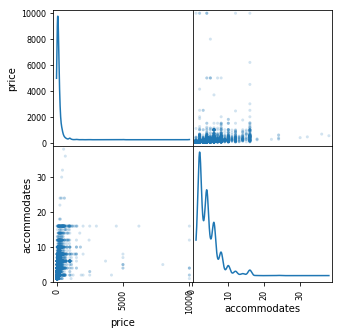

In [90]:
# testing scatter matrix for later use

pd.plotting.scatter_matrix(temp, alpha=0.2, figsize=(5, 5), diagonal='kde')
# plt.show()

C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162C04C8320>,
      dtype=object)

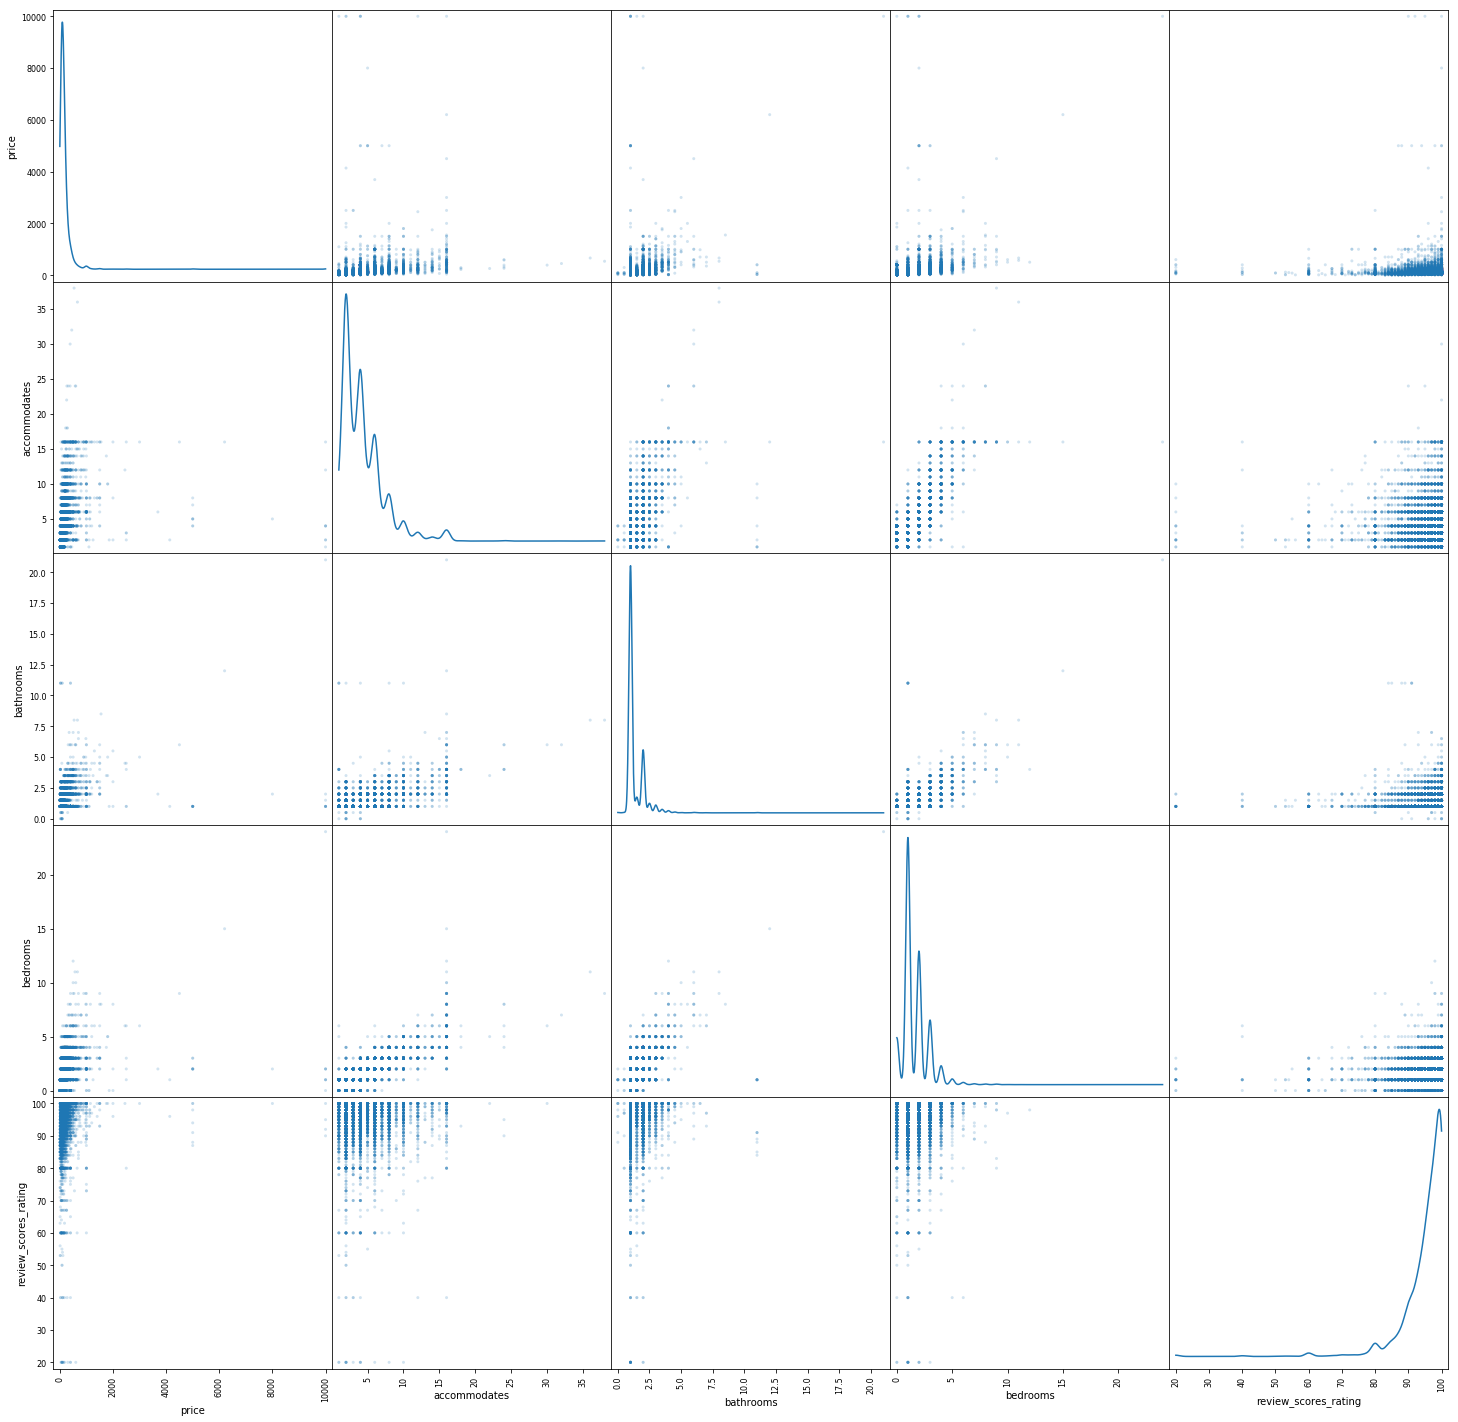

In [128]:

temp = air_df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']]
temp['price'] = temp['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

pd.plotting.scatter_matrix(temp, alpha=0.2, figsize=(25, 25), diagonal='kde')